In [1]:
# Trying to preprocess the data better

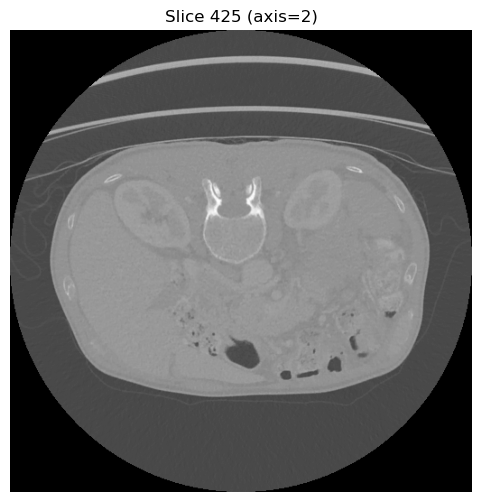

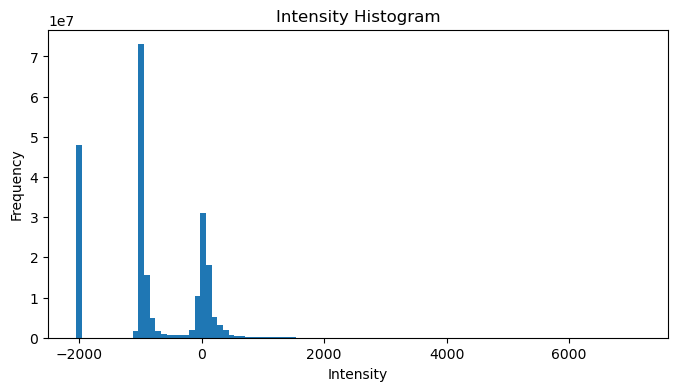

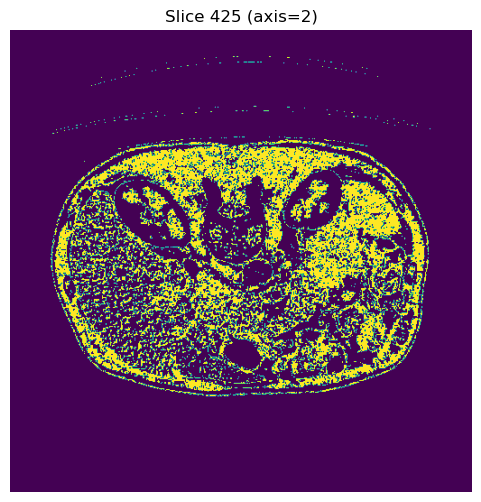

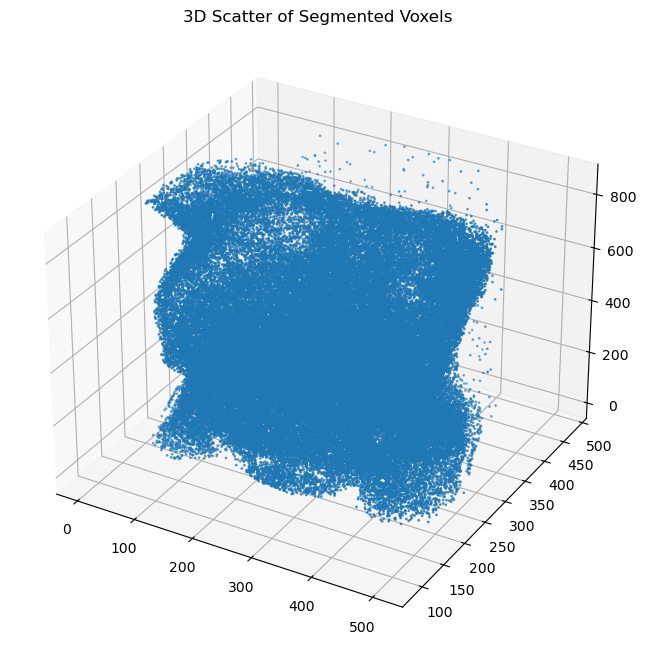

In [8]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --------------------------
# User-configurable settings
# --------------------------
# Path to your NIfTI file (.nii or .nii.gz)
nii_path = "C:/Users/DELL/Downloads/batch_3/batch_3/102218_00001_0000.nii.gz"
# Axis for slice (0=sagittal, 1=coronal, 2=axial)
axis = 2
# Threshold bounds for segmentation (e.g., soft tissue)
lower_threshold = 20
upper_threshold = 100
# Max points to plot in 3D scatter
max_points = 100000
# --------------------------

# Function definitions

def load_nifti(path):
    """
    Load a NIfTI file (.nii or .nii.gz) and return the image data and affine matrix.
    """
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    img = nib.load(path)
    data = img.get_fdata()
    affine = img.affine
    return data, affine


def show_slice(data, slice_idx=None, axis=2, cmap='gray'):
    """
    Display a single slice from the volume along the specified axis.
    """
    if slice_idx is None:
        slice_idx = data.shape[axis] // 2
    if axis == 0:
        img = data[slice_idx, :, :]
    elif axis == 1:
        img = data[:, slice_idx, :]
    else:
        img = data[:, :, slice_idx]
    plt.figure(figsize=(6,6))
    plt.imshow(np.rot90(img), cmap=cmap)
    plt.title(f"Slice {slice_idx} (axis={axis})")
    plt.axis('off')
    plt.show()


def plot_histogram(data, bins=100):
    """
    Plot intensity histogram of the volume.
    """
    flat = data.flatten()
    plt.figure(figsize=(8,4))
    plt.hist(flat, bins=bins)
    plt.title('Intensity Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.show()


def threshold_segmentation(data, lower, upper):
    """
    Simple threshold-based segmentation between lower and upper.
    """
    seg = np.zeros(data.shape, dtype=np.uint8)
    mask = (data >= lower) & (data <= upper)
    seg[mask] = 1
    return seg


def show_3d_scatter(seg_data, spacing=(1.0,1.0,1.0), threshold=0.5, max_points=100000):
    """
    3D scatter plot of segmented voxels above threshold.
    """
    coords = np.column_stack(np.nonzero(seg_data > threshold))
    if coords.shape[0] > max_points:
        idx = np.random.choice(coords.shape[0], max_points, replace=False)
        coords = coords[idx]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(coords[:,0]*spacing[0],
               coords[:,1]*spacing[1],
               coords[:,2]*spacing[2],
               s=1)
    ax.set_title('3D Scatter of Segmented Voxels')
    plt.show()

# --------------------------
# Main execution
# --------------------------
if __name__ == '__main__':
    # Load NIfTI
    data, affine = load_nifti(nii_path)
    # Show slice
    show_slice(data, axis=axis)
    # Plot histogram
    plot_histogram(data)
    # Segment
    seg = threshold_segmentation(data, lower_threshold, upper_threshold)
    # Show segmented slice
    show_slice(seg, axis=axis, cmap='viridis')
    # 3D scatter of segmentation
    show_3d_scatter(seg, threshold=0.5, max_points=max_points)


--- NIfTI File Metadata ---
Data shape: (512, 512, 851)
Data type: float64
Voxel dimensions (mm): (0.721, 0.721, 0.8)
Affine matrix:
[[-7.21000016e-01  0.00000000e+00  0.00000000e+00  1.92998795e+02]
 [ 0.00000000e+00 -7.21000016e-01  0.00000000e+00  1.84209793e+02]
 [ 0.00000000e+00  0.00000000e+00  8.00000012e-01  1.24550000e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Header details:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 851   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.    0.721 0.721 0.8   0.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      

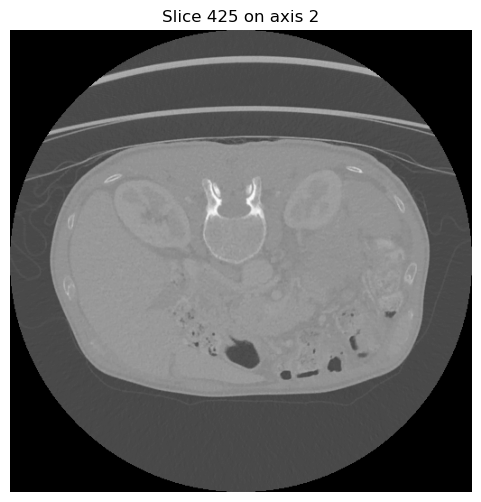

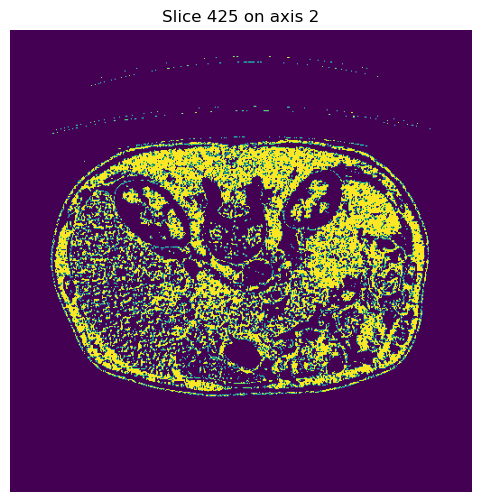

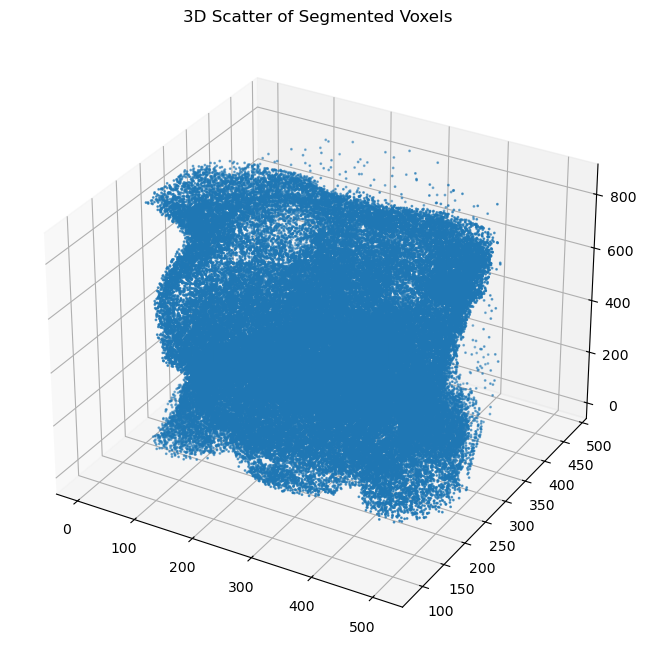

In [9]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio

# --------------------------
# User-configurable settings
# --------------------------
# Path to your NIfTI file (.nii or .nii.gz)
nii_path = "C:/Users/DELL/Downloads/batch_3/batch_3/102218_00001_0000.nii.gz"
# Axis for slice (0=sagittal, 1=coronal, 2=axial)
axis = 2
# Threshold bounds for segmentation (e.g., soft tissue)
lower_threshold = 20
upper_threshold = 100
# Max points to plot in 3D scatter
max_points = 100000
# Output GIF path
gif_path = 'abdomen_animation.gif'
# Duration between frames in seconds
gif_duration = 0.1
# --------------------------

# Function definitions

def load_nifti(path):      # Loads a NIfTI file (.nii or .nii.gz) and return the image data, affine matrix, and header.

    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    img = nib.load(path)
    data = img.get_fdata()
    affine = img.affine
    header = img.header
    return data, affine, header


def print_metadata(header, data, affine):
    """
    Print key metadata: data shape, voxel size, data type, affine matrix, and header summary.
    """
    print("--- NIfTI File Metadata ---")
    print(f"Data shape: {data.shape}")
    print(f"Data type: {data.dtype}")
    print(f"Voxel dimensions (mm): {header.get_zooms()}")
    print(f"Affine matrix:\n{affine}")
    print("Header details:")
    print(header)
    print("----------------------------")


def save_gif(data, gif_path, axis=2, duration=0.1):
    """
    Save an animated GIF cycling through slices along the specified axis.
    """
    frames = []
    num_slices = data.shape[axis]
    for i in range(num_slices):
        if axis == 0:
            slice_img = data[i, :, :]
        elif axis == 1:
            slice_img = data[:, i, :]
        else:
            slice_img = data[:, :, i]
        # Normalize slice to 0-255 uint8
        norm = (slice_img - np.min(slice_img)) / np.ptp(slice_img)
        img_uint8 = (norm * 255).astype(np.uint8)
        frames.append(img_uint8)
    imageio.mimsave(gif_path, frames, duration=duration)
    print(f"GIF saved to {gif_path}")


def show_slice(data, slice_idx=None, axis=2, cmap='gray'):
    """
    Display a single slice from the volume along the specified axis.
    """
    if slice_idx is None:
        slice_idx = data.shape[axis] // 2
    if axis == 0:
        img = data[slice_idx, :, :]
    elif axis == 1:
        img = data[:, slice_idx, :]
    else:
        img = data[:, :, slice_idx]
    plt.figure(figsize=(6,6))
    plt.imshow(np.rot90(img), cmap=cmap)
    plt.title(f"Slice {slice_idx} on axis {axis}")
    plt.axis('off')
    plt.show()


def threshold_segmentation(data, lower, upper):
    """
    Perform simple threshold-based segmentation between lower and upper.
    """
    seg = np.zeros(data.shape, dtype=np.uint8)
    mask = (data >= lower) & (data <= upper)
    seg[mask] = 1
    return seg


def show_3d_scatter(seg_data, spacing=(1.0,1.0,1.0), threshold=0.5, max_points=100000):
    """
    3D scatter plot of segmented voxels above a threshold.
    """
    coords = np.column_stack(np.nonzero(seg_data > threshold))
    if coords.shape[0] > max_points:
        idx = np.random.choice(coords.shape[0], max_points, replace=False)
        coords = coords[idx]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(coords[:,0]*spacing[0],
               coords[:,1]*spacing[1],
               coords[:,2]*spacing[2],
               s=1)
    ax.set_title('3D Scatter of Segmented Voxels')
    plt.show()

# --------------------------
# Main execution
# --------------------------
if __name__ == '__main__':
    # Load NIfTI data and metadata
    data, affine, header = load_nifti(nii_path)
    # Print all metadata and header info
    print_metadata(header, data, affine)
    # Generate and save GIF of slices
    save_gif(data, gif_path, axis=axis, duration=gif_duration)
    # Display middle slice
    show_slice(data, axis=axis)
    # Perform threshold segmentation
    seg = threshold_segmentation(data, lower_threshold, upper_threshold)
    # Display segmented slice
    show_slice(seg, axis=axis, cmap='viridis')
    # 3D scatter plot of segmentation
    show_3d_scatter(seg, threshold=0.5, max_points=max_points)


In [10]:
#!/usr/bin/env python3
import os
import shutil
import numpy as np
import pandas as pd
import nibabel as nib
from skimage.morphology import binary_closing, square
from PIL import Image
from tqdm import tqdm

# ─────────────────────────────────────────────────────────────
# CONFIGURATION
# ─────────────────────────────────────────────────────────────
label_xlsx     = "clinical_information.xlsx"
ct_dir         = "C:/Users/DELL/Downloads/batch_2"
mask_dir       = "C:/FYP_DATASET/masks/merged"
output_dir     = "cropped_windowed"

# mask & crop params
mask_label     = 4       # which mask value to keep
primary_thresh = 0.007   # min fraction of slice covered by mask
drop_frac      = 0.30    # bottom‐percentile fallback
roi_margin     = 5       # padding around ROI bbox

# windowing parameters
window_center  = 40
window_width   = 400

# output resolution
resize_shape   = (224, 224)
# ─────────────────────────────────────────────────────────────

def find_file_by_pid(directory, pid):
    for fn in os.listdir(directory):
        if fn.startswith(f"{pid}_") and fn.endswith(".nii.gz"):
            return os.path.join(directory, fn)
    return None


def load_nifti(path):
    return nib.load(path, mmap=True).get_fdata()


def window_slice(slice2d, wc, ww):
    lo, hi = wc - ww/2, wc + ww/2
    sl = np.clip(slice2d, lo, hi)
    return ((sl - lo)/(hi - lo)*255).astype(np.uint8)

# ─────────────────────────────────────────────────────────────
# 1) Load labels for class separation
# ─────────────────────────────────────────────────────────────
df = (pd.read_excel(label_xlsx, engine="openpyxl")
        .rename(columns={
            "PANORAMA_patient_id":"pid",
            "label":"label_str"
        }))
df["pid"] = df["pid"].astype(int).astype(str)
df["class"] = df["label_str"].str.upper().map(lambda x: "PDAC" if x=="PDAC" else "Control")
class_map = dict(zip(df["pid"], df["class"]))

# ─────────────────────────────────────────────────────────────
# 2) Prepare output directories per class
# ─────────────────────────────────────────────────────────────
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
for cls in ("PDAC", "Control"):
    os.makedirs(os.path.join(output_dir, cls, "intensity"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, cls, "mask"),      exist_ok=True)

# ─────────────────────────────────────────────────────────────
# 3) Process each volume: crop, ROI, window; save under class folders
# ─────────────────────────────────────────────────────────────
pids = [fn.split("_",1)[0] for fn in os.listdir(ct_dir) if fn.endswith(".nii.gz")]
for pid in tqdm(pids, desc="Cropping & Windowing"):
    cls = class_map.get(pid)
    if cls not in ("PDAC","Control"):
        continue
    ct_path   = find_file_by_pid(ct_dir,  pid)
    mask_path = find_file_by_pid(mask_dir, pid)
    if not ct_path or not mask_path:
        continue

    # load volumes
    ct_vol   = load_nifti(ct_path)
    mask_vol = (load_nifti(mask_path) == mask_label)

    # hole-filling on each slice
    Z, H, W = mask_vol.shape
    for z in range(Z):
        mask_vol[z] = binary_closing(mask_vol[z], square(3))

    # select slices by coverage
    mask_area = mask_vol.sum(axis=(1,2))
    coverage  = mask_area / (H * W)
    sel = np.where(coverage >= primary_thresh)[0]
    if sel.size == 0:
        idx = np.where(mask_area > 0)[0]
        if idx.size == 0:
            continue
        areas  = mask_area[idx]
        cutoff = np.percentile(areas, drop_frac*100)
        sel    = idx[areas >= cutoff]

    # compute ROI bbox ± margin
    ys, xs, _ = np.where(mask_vol.transpose(1,2,0))
    y0 = max(ys.min() - roi_margin, 0)
    y1 = min(ys.max() + roi_margin, H)
    x0 = max(xs.min() - roi_margin, 0)
    x1 = min(xs.max() + roi_margin, W)

    # crop + window + save each selected slice
    for z in sel:
        crop_ct = ct_vol[z, y0:y1, x0:x1]
        crop_mk = (mask_vol[z, y0:y1, x0:x1].astype(np.uint8) * 255)

        # window-level
        win = window_slice(crop_ct, window_center, window_width)

        fn = f"{pid}_z{z:03d}.png"
        Image.fromarray(win).resize(resize_shape).save(
            os.path.join(output_dir, cls, "intensity", fn)
        )
        Image.fromarray(crop_mk).resize(resize_shape).save(
            os.path.join(output_dir, cls, "mask", fn)
        )

print(" Cropping, ROI & windowing complete.")


C:\Users\DELL\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,
Cropping & Windowing: 100%|████████████████████████████████████████████████████████| 566/566 [2:29:10<00:00, 15.81s/it]

✅ Cropping, ROI & windowing complete.
